In [20]:
from sklearn.datasets import make_moons
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.nn import Sequential
import numpy as np

In [3]:
# Create a dataset of 256 points with a little noise
X, y = make_moons(256, noise=0.1)

# Store the data as a Pandas data frame and save it to a CSV file
df = pd.DataFrame(dict(x0=X[:,0], x1=X[:,1], y=y))
df.to_csv('sample_data.csv')

Size X:(256, 2)
Size y:(256,)


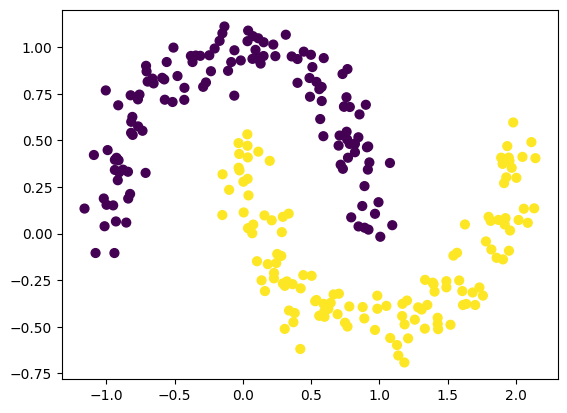

In [5]:
# Load the data from the CSV file in a Pandas DataFrame
data = pd.read_csv("sample_data.csv")

# Create a 2D numpy array from the x0 and x1 columns
X_orig = data[["x0", "x1"]].to_numpy()

# Create a 1D numpy array from the y column
y_orig = data["y"].to_numpy()

# Print the sizes of the generated 2D points X and the corresponding labels Y
print(f"Size X:{X_orig.shape}")
print(f"Size y:{y_orig.shape}")

# Visualize the dataset. The color of the points is determined by the labels `y_orig`.
plt.scatter(X_orig[:, 0], X_orig[:, 1], s=40, c=y_orig)
plt.show()

In [7]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [9]:
# Convert the 2D points to a float32 tensor
X = torch.tensor(X_orig, dtype=torch.float32)

# Upload the tensor to the device
X = X.to(DEVICE)

print(f"Size X:{X.shape}")

# Convert the labels to a long interger tensor
y = torch.from_numpy(y_orig).type(torch.LongTensor)

# Upload the tensor to the device
y = y.to(DEVICE)

print(f"Size y:{y.shape}")

Size X:torch.Size([256, 2])
Size y:torch.Size([256])


In [12]:
class NaiveNet(nn.Module):
    def __init__(self):
        super(NaiveNet, self).__init__()
        self.layers = Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
        )

    def forward(self, x):
        return self.layers(x)
    
    def predict(self, x):
        return torch.argmax(self.forward(x), 1)

In [15]:
model = NaiveNet().to(DEVICE)
print(NaiveNet().to(DEVICE))

NaiveNet(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=2, bias=True)
  )
)


---

## Exercise 3.2

In [ ]:
## Get the samples
# X_samples = ...
# print("Sample input:\n", X_samples)

## Do a forward pass of the network
# output = ...
# print("\nNetwork output:\n", output)

## Predict the label of each point
# y_predicted = ...
# print("\nPredicted labels:\n", y_predicted)

In [18]:
## Get the samples
X_samples = X[:5, :]
print("Sample input:\n", X_samples)

## Do a forward pass of the network
output = model(X_samples)
print("\nNetwork output:\n", output)

## Predict the label of each point
y_predicted = model.predict(X_samples)
print("\nPredicted labels:\n", y_predicted)

Sample input:
 tensor([[ 1.9180,  0.0488],
        [ 0.0708,  0.9376],
        [-0.6969,  0.8156],
        [ 1.2023, -0.3593],
        [-0.0150,  0.9290]], device='cuda:0')

Network output:
 tensor([[ 0.1875, -0.1399],
        [-0.1290, -0.3327],
        [-0.3186, -0.3742],
        [ 0.0196,  0.0624],
        [-0.1507, -0.3394]], device='cuda:0', grad_fn=<AddmmBackward0>)

Predicted labels:
 tensor([0, 0, 0, 1, 0], device='cuda:0')


---

In [19]:
# Implement the train function given a training dataset X and correcsponding labels y
def train(model, X, y):
  """
    Training the Neural Network

    Args:
      X: torch.Tensor
        Input data
      y: torch.Tensor
        Class Labels/Targets

    Returns:
      losses: Float
        Cross Entropy Loss; Cross-entropy builds upon the idea of entropy
        from information theory and calculates the number of bits required
        to represent or transmit an average event from one distribution
        compared to another distribution.
    """
  # The Cross Entropy Loss is suitable for classification problems
  loss_function = nn.CrossEntropyLoss()

  # Create an optimizer (Stochastic Gradient Descent) that will be used to train the network
  learning_rate = 1e-2
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  # Number of epochs
  epochs = 15000

  # List of losses for visualization
  losses = []

  for i in range(epochs):
    # Pass the data through the network and compute the loss
    # We'll use the whole dataset during the training instead of using batches
    # in to order to keep the code simple for now.
    y_logits = model.forward(X)
    loss = loss_function(y_logits, y)

    # Clear the previous gradients and compute the new ones
    optimizer.zero_grad()
    loss.backward()

    # Adapt the weights of the network
    optimizer.step()

    # Store the loss
    losses.append(loss.item())

    # Print the results at every 1000th epoch
    if i % 1000 == 0:
      print(f"Epoch {i} loss is {loss.item()}")


  return losses


# Create a new network instance a train it
model = NaiveNet().to(DEVICE)
losses = train(model, X, y)

Epoch 0 loss is 0.7682300806045532
Epoch 1000 loss is 0.26456618309020996
Epoch 2000 loss is 0.23178258538246155
Epoch 3000 loss is 0.21369139850139618
Epoch 4000 loss is 0.19586031138896942
Epoch 5000 loss is 0.17692077159881592
Epoch 6000 loss is 0.15682169795036316
Epoch 7000 loss is 0.13652199506759644
Epoch 8000 loss is 0.11719118803739548
Epoch 9000 loss is 0.10000789910554886
Epoch 10000 loss is 0.08544590324163437
Epoch 11000 loss is 0.07334814220666885
Epoch 12000 loss is 0.06336045265197754
Epoch 13000 loss is 0.05527342110872269
Epoch 14000 loss is 0.04871287941932678


Text(0, 0.5, 'Loss')

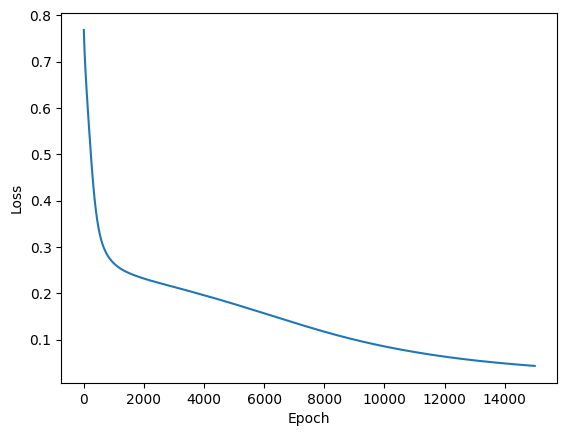

In [21]:
plt.plot(np.linspace(1, len(losses), len(losses)), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")